In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [3]:
data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [4]:
X = data[:, :3]
X

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [5]:
y = data[:,-1]
y

array([152., 185., 180., 196., 142., 101., 149., 115., 175., 164., 141.,
       141., 184., 152., 148., 192., 147., 183., 177., 159., 177., 175.,
       175., 149., 192.])

In [6]:
def bfgs (DF,xn_1 , xn , e ,mx, a = 1):
    epoch = mx 
    alpha = a
    epsilon = e 
    identity = np.eye(xn.shape[0])
    # initailize B_inverse
    B_inv = identity
    for i in range(epoch):
        Delta_X = (xn - xn_1).reshape(-1,1)
        Delta_y = (DF(xn) - DF(xn_1)).reshape(-1,1)
        print("xn_1:  " ,xn_1)
        print(" xn : ",xn )
        print(" Dfxn_1:  ",DF(xn_1) )
        print(" Dfxn :  ", DF(xn) )
        
 
        B_inv = (identity - ((Delta_X@ Delta_y.T) / (Delta_y.T @ Delta_X ))) @ B_inv @ (identity -((Delta_y @ Delta_X.T) / (Delta_y.T @ Delta_X)))  +((Delta_X @ Delta_X.T)/(Delta_y.T @ Delta_X))
        print("B_inv ",B_inv)
        xn_1 = xn
        g0 =  DF(xn)
        print(" g0 : " ,g0)
        xn = xn - alpha * (B_inv @ DF(xn))
        if (np.linalg.norm(g0) < epsilon):
            print("Found solution after ",i , " iterations.\n")
            print("x_min = ",xn)
            print("Gradient =  ",g0)
            break 

In [8]:
added_col = np.ones([X.shape[0],1])
added_col

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [9]:
X = np.concatenate([added_col ,X] , axis = 1)
X

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [50]:
def bfgs_multi_cost (x , y , e ,mx, a = 1):
    y = y.reshape(-1,1)
    print(" y : ",y.shape)
    epoch = mx 
    alpha = a
    epsilon = e 
    identity = np.eye(x.shape[1])
    # initailize B_inverse matrix with identity matrix
    B_inv = identity
    # initialize theta vector  note we need delta theta
    theta0 = np.zeros((x.shape[1],1))
    theta = np.ones((x.shape[1],1))
    print("theta ",theta.shape)
    theta = theta * 0.1
    # m is :
    m = x.shape[0]
    # intialilize y predict vector
    y_hat0 = np.zeros(m)
    y_hat = np.zeros(m)
 
    cost_list = []
    th0 =[]
    th1 =[]
    th2 =[]
    th3 =[]
    for i in range(epoch):
        th0.append(theta[0])
        th1.append(theta[1])
        th2.append(theta[2])
        th3.append(theta[3])
        # we will duplicate all of the calculation for theta old and thta new
        #calculate y predict = x(m*n) @ theta(n*1) = (m * 1) like y 
        y_hat0 = x @ theta0 
        y_hat = x @ theta
        # calculate error vector = y predict - y
        error0 = y_hat0 - y
        error = y_hat - y
        # then we will calculate cost function (note :(error**2) == (error @ error) but dot product is faster
        cost0 = (error0.T @ error0) / (2 * m)
        cost = (error.T @ error) / (2 * m)
        print("cost = ",cost[0,0])
        # append cost to cost_list
      
        cost_list.append(cost[0,0])
        # calculate gradiant of theta vector 
        grad_vec0 = (x.T @ error0 ) / m
        grad_vec = (x.T @ error ) / m
        print("gradiant vector \n",grad_vec.shape)
        # calculate gradiant norm 
        grad_norm = np.linalg.norm(grad_vec)
        print("gradiant norm \n",grad_norm)
        #  calculate delta of theta
        delta_theta = theta - theta0
        # calculate delta of gradiant vector
        delta_grad = grad_vec - grad_vec0
        # calculate B inverse
        B_inv = (identity - ((delta_theta@ delta_grad.T) / (delta_grad.T @ delta_theta))) @ B_inv @ (identity -((delta_grad @ delta_theta.T) / (delta_grad.T @ delta_theta)))  +((delta_theta @ delta_theta.T)/(delta_grad.T @ delta_theta))
        print("B_inv ",B_inv)
        theta0 = theta 
        theta = theta - alpha * (  B_inv @ grad_vec)
        
        if i > 0 :
            
            diff = np.abs(cost_list[-1] - cost_list[-2])
            # convergence check (cost check)  and stop criteria (Gradient Check)
            if diff < epsilon  or grad_norm < epsilon :
                
                print("Found solution after ",i , " iterations.\n")
                print("theta _min = ",theta)
                print("Gradient =  ",grad_vec)
                break 
          

     
    return theta ,y_hat ,error , cost,cost_list ,th0,th1,th2,th3
    

In [51]:
epsilon = 0.001
mx = 500
alpha = 0.1
theta ,y_hat ,error , cost,cost_list ,th0,th1,th2,th3 = bfgs_multi_cost (X, y , epsilon  ,mx, alpha)

 y :  (25, 1)
theta  (4, 1)
cost =  9717.073800000002
gradiant vector 
 (4, 1)
gradiant norm 
 19509.66854085594
B_inv  [[ 1.32257848 -0.00156435 -0.00337127 -0.01106197]
 [-0.00156435  0.67429282 -0.32751409 -0.3352048 ]
 [-0.00337127 -0.32751409  0.67067899 -0.33701171]
 [-0.01106197 -0.3352048  -0.33701171  0.65529758]]
cost =  7872.244611351011
gradiant vector 
 (4, 1)
gradiant norm 
 17558.53753992137
B_inv  [[ 1.32258383e+00 -5.79025802e-04 -9.55254515e-04 -1.43319383e-02]
 [-5.79025802e-04  6.58740639e-01 -3.55484373e-01 -2.89364517e-01]
 [-9.55254515e-04 -3.55484373e-01  6.26493079e-01 -2.58043631e-01]
 [-1.43319383e-02 -2.89364517e-01 -2.58043631e-01  5.22156143e-01]]
cost =  6461.507780788384
gradiant vector 
 (4, 1)
gradiant norm 
 12214.592667606055
B_inv  [[ 1.32257094e+00 -8.87574780e-04 -3.20160411e-03 -1.18924793e-02]
 [-8.87574780e-04  6.54354222e-01 -4.23160335e-01 -2.20163721e-01]
 [-3.20160411e-03 -4.23160335e-01  2.99416539e-01  1.17044570e-01]
 [-1.18924793e-02 -2

In [45]:
cost_list

[9717.073800000002,
 7872.244611351011,
 6461.507780788384,
 4821.676392687466,
 2447.2347694649834,
 1917.0677822191035,
 1553.4037654945405,
 1258.8382633078352,
 1020.2383878620941,
 826.9707613904704,
 670.4223435639635,
 543.616567336009,
 440.9024092390475,
 357.7025363141066,
 290.30930511290006,
 235.7195208796623,
 191.5005924788592,
 155.6821178775961,
 126.66806837782323,
 103.16565783620744,
 84.12772672452422,
 68.70607321120794,
 56.213651330419786,
 46.093951492339905,
 37.89619869022218,
 31.255263042094853,
 25.87538732386098,
 21.517006265686387,
 17.986070176947127,
 15.12539707753754,
 12.807667919599103,
 10.92975271269526,
 9.408114681011188,
 8.175087626691013,
 7.175860590343656,
 6.366035422437941,
 5.709648412693668,
 5.177567806613323,
 4.7461957907514485,
 4.396417097811659,
 4.1127473739388,
 3.882643353522373,
 3.695944098205053,
 3.5444183980142436,
 3.4213981639220843,
 3.321481473564633,
 3.2402920361176215,
 3.1742843567804186,
 3.120585918029505,
 3.0

In [47]:
from sklearn.metrics import r2_score
r2_score(y,y_hat)

0.9896255573811703

In [48]:
def plot(x ,y):
    plt.plot(x,y,'-ob','r')

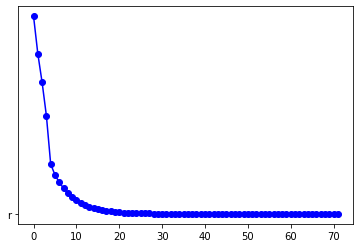

In [49]:
plot(range(len(cost_list)),cost_list)

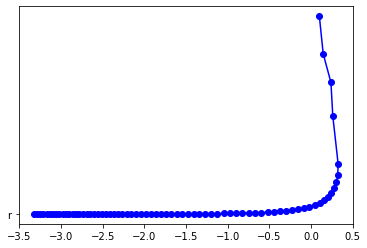

In [52]:
plot(th0 , cost_list)

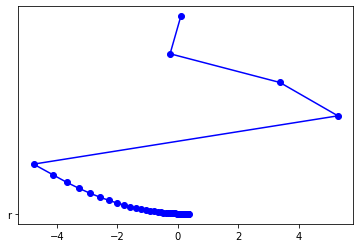

In [53]:
plot(th1 , cost_list)

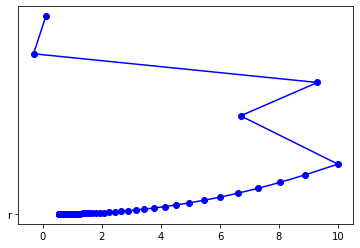

In [54]:
plot(th2 , cost_list)

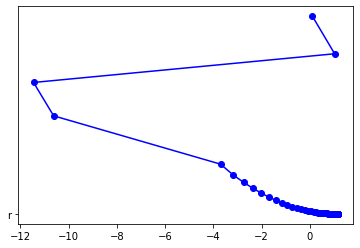

In [55]:
plot(th3 , cost_list)